# Energy Efficiency Prediction Project

Energy efficiency in buildings is crucial for reducing energy consumption and optimizing heating and cooling systems. This project aims to predict **Heating Load (Y1)** and **Cooling Load (Y2)** based on architectural and design features such as **Relative Compactness, Surface Area, Wall Area, Roof Area, and Glazing Area**. Using machine learning techniques, we will analyze how these factors influence energy consumption and identify optimal configurations for energy-efficient building designs. The dataset consists of **768 simulated building variations**, making it a valuable resource for regression modeling, feature analysis, and energy optimization studies.


## Feature Descriptions

The dataset contains **eight input features (X1-X8)** that describe building characteristics, and **two output variables (Y1, Y2)** representing energy efficiency metrics.

### **Input Features (X1 - X8)**
1. **X1 - Relative Compactness**:  
   - A measure of how compact the building shape is.  
   - Higher values indicate a more compact structure, which typically reduces heat loss.

2. **X2 - Surface Area (m²)**:  
   - The total exterior surface area of the building.  
   - Larger surface areas can lead to higher heat loss or gain.

3. **X3 - Wall Area (m²)**:  
   - The total area covered by walls.  
   - More wall area can influence insulation and energy retention.

4. **X4 - Roof Area (m²)**:  
   - The total area of the roof.  
   - Roof size affects exposure to sunlight and heat retention.

5. **X5 - Overall Height (m)**:  
   - The building’s height from the ground to the roof.  
   - Taller buildings may have different heating and cooling needs due to air circulation.

6. **X6 - Orientation**:  
   - Represents the building’s direction (1 to 12).  
   - Affects sunlight exposure, which influences heating and cooling efficiency.

7. **X7 - Glazing Area (%)**:  
   - Percentage of the building’s surface covered by windows.  
   - More glazing can increase natural light but also impact heat loss/gain.

8. **X8 - Glazing Area Distribution**:  
   - Defines where glazing (windows) is placed (0 = no glazing, 1-5 = different distributions).  
   - Placement impacts heat gain from sunlight.

### **Output Variables (Target)**
1. **Y1 - Heating Load (kWh/m²)**:  
   - The amount of energy required to heat the building in cold conditions.

2. **Y2 - Cooling Load (kWh/m²)**:  
   - The amount of energy required to cool the building in hot conditions.

The goal is to analyze how these **design parameters (X1-X8) influence energy consumption (Y1, Y2)** and optimize them for energy efficiency.


In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
## Import the data

df = pd.read_csv('data\energy_efficiency.csv')
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [67]:
## rename the columns for better understanding
df = df.rename({"X1": "relative_compactness",
    "X2": "surface_area(m²)",  
    "X3": "wall_area(m²)",  
    "X4": "roof_area(m²)",  
    "X5": "overall_height(m)",  
    "X6": "orientation",  
    "X7": "glazing_area(m²)",  
    "X8": "glazing_area_Distribution",
    "Y1": "heating_load(kWh/m²)",  
    "Y2": "cooling_load(kWh/m²)"}, axis=1)

df.head()

,relative_compactness,surface_area(m²),wall_area(m²),roof_area(m²),overall_height(m),orientation,glazing_area(m²),glazing_area_Distribution,heating_load(kWh/m²),cooling_load(kWh/m²)
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [68]:
df.describe()

,relative_compactness,surface_area(m²),wall_area(m²),roof_area(m²),overall_height(m),orientation,glazing_area(m²),glazing_area_Distribution,heating_load(kWh/m²),cooling_load(kWh/m²)
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


1. Relative Compactness ranges from 0.62 to 0.98, with a mean of 0.76. Higher values indicate better energy efficiency due to minimized heat loss.
2. Surface Area (m²) varies between 514.5 m² and 808.5 m², meaning the dataset includes both small and large buildings.
3. Wall Area (m²) and Roof Area (m²) are positively correlated, as larger buildings generally have more wall and roof area.
4. Overall Height (m) has two distinct values: 3.5 m (single-story) and 7 m (multi-story buildings).
5. Orientation is categorical, ranging from 2 to 5, indicating different building directions (e.g., North, East, South, West).
6. Glazing Area (m²) varies from 0 to 0.4, indicating some buildings have no windows, while others have significant glazing.
7. Glazing Area Distribution is categorical (0 to 5), representing different glass panel placements.
8. Heating Load (kWh/m²) ranges from 6.01 to 43.1, while Cooling Load (kWh/m²) varies between 10.9 and 48.03, suggesting significant differences in energy needs across buildings.

In [69]:
## Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   relative_compactness       768 non-null    float64
 1   surface_area(m²)           768 non-null    float64
 2   wall_area(m²)              768 non-null    float64
 3   roof_area(m²)              768 non-null    float64
 4   overall_height(m)          768 non-null    float64
 5   orientation                768 non-null    int64  
 6   glazing_area(m²)           768 non-null    float64
 7   glazing_area_Distribution  768 non-null    int64  
 8   heating_load(kWh/m²)       768 non-null    float64
 9   cooling_load(kWh/m²)       768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [70]:
## null values
df.isnull().sum()

relative_compactness         0
surface_area(m²)             0
wall_area(m²)                0
roof_area(m²)                0
overall_height(m)            0
orientation                  0
glazing_area(m²)             0
glazing_area_Distribution    0
heating_load(kWh/m²)         0
cooling_load(kWh/m²)         0
dtype: int64

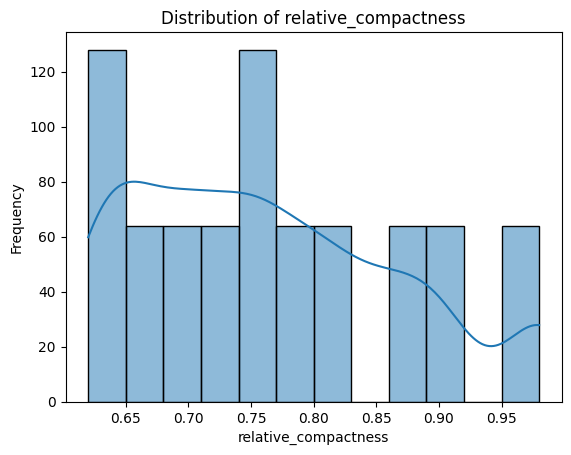

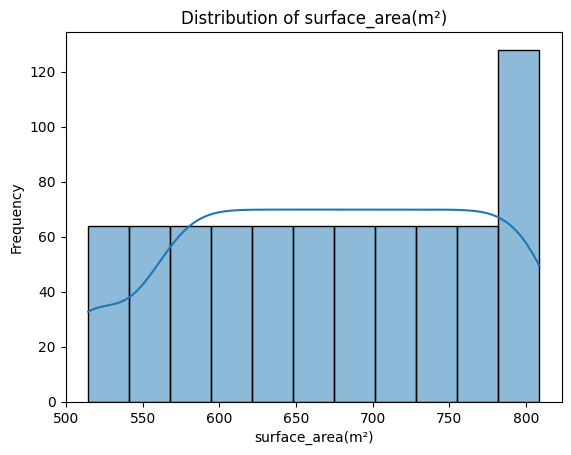

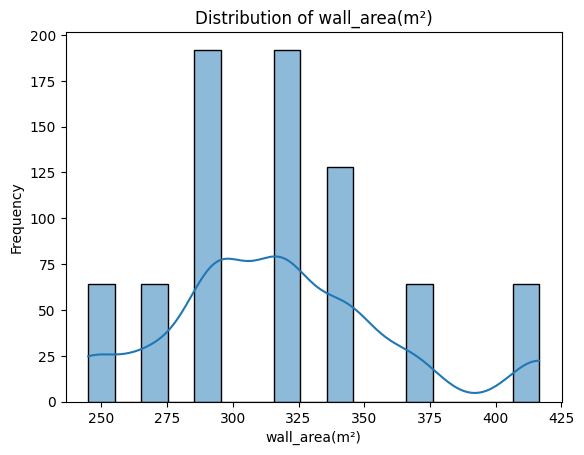

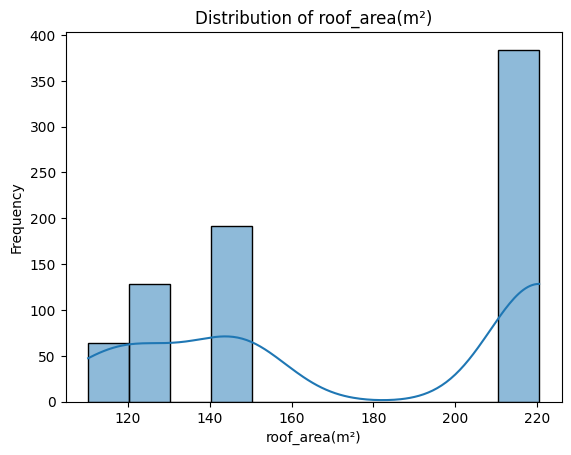

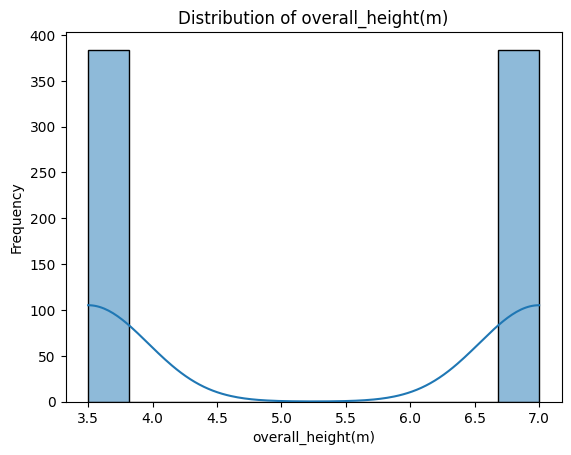

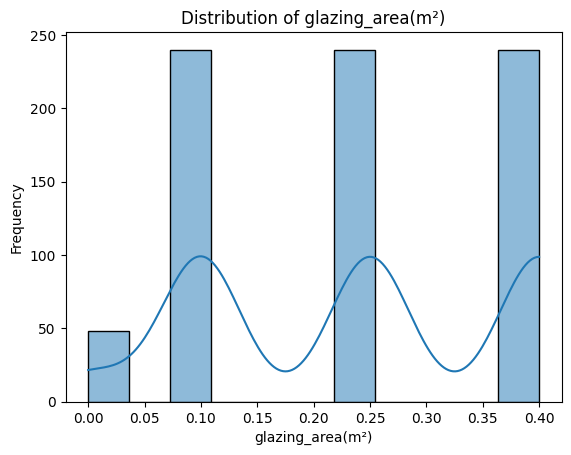

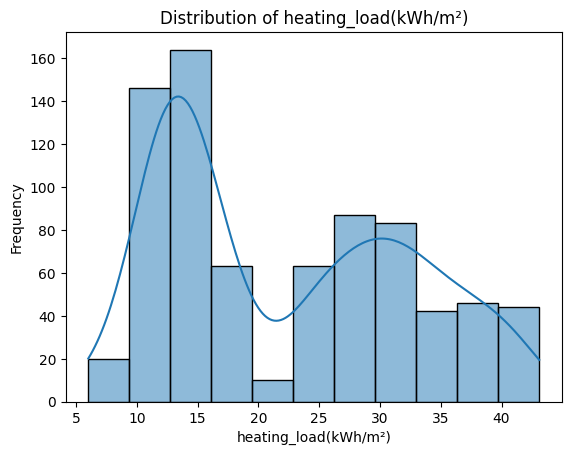

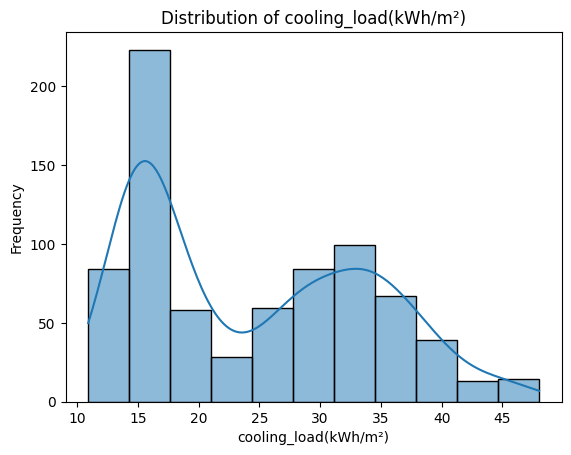

In [71]:
## Distribution of attributes
cat_col = [col for col in df.columns if df[col].dtype=='int64']
num_cols = [col for col in df.columns if col not in cat_col]

for col in num_cols:
    sns.histplot(data=df, x=col, kde=True, edgecolor = 'black')
    plt.title(f"Distribution of {col}")
    plt.ylabel('Frequency')
    plt.show()

1. Bounded Distributions:
Variables like Glazing Area, Overall Height, Roof Area, and Wall Area only take values within certain ranges. This suggests these attributes are constrained by specific building design parameters, reflecting limited variability in the dataset.

2. Uniform Distribution:
Both Surface Area and Relative Compactness show nearly uniform distributions, with values spread relatively evenly across the range. However, there are a few bars that stand out with significantly higher frequencies, possibly indicating some clustering or outliers in specific value ranges.

3. Bimodal Distribution:
Heating Load and Cooling Load display bimodal (two-peak) distributions. This suggests two distinct groups of buildings, each with different energy consumption patterns. It could be a result of varied building shapes, orientations, or glazing areas influencing energy efficiency.

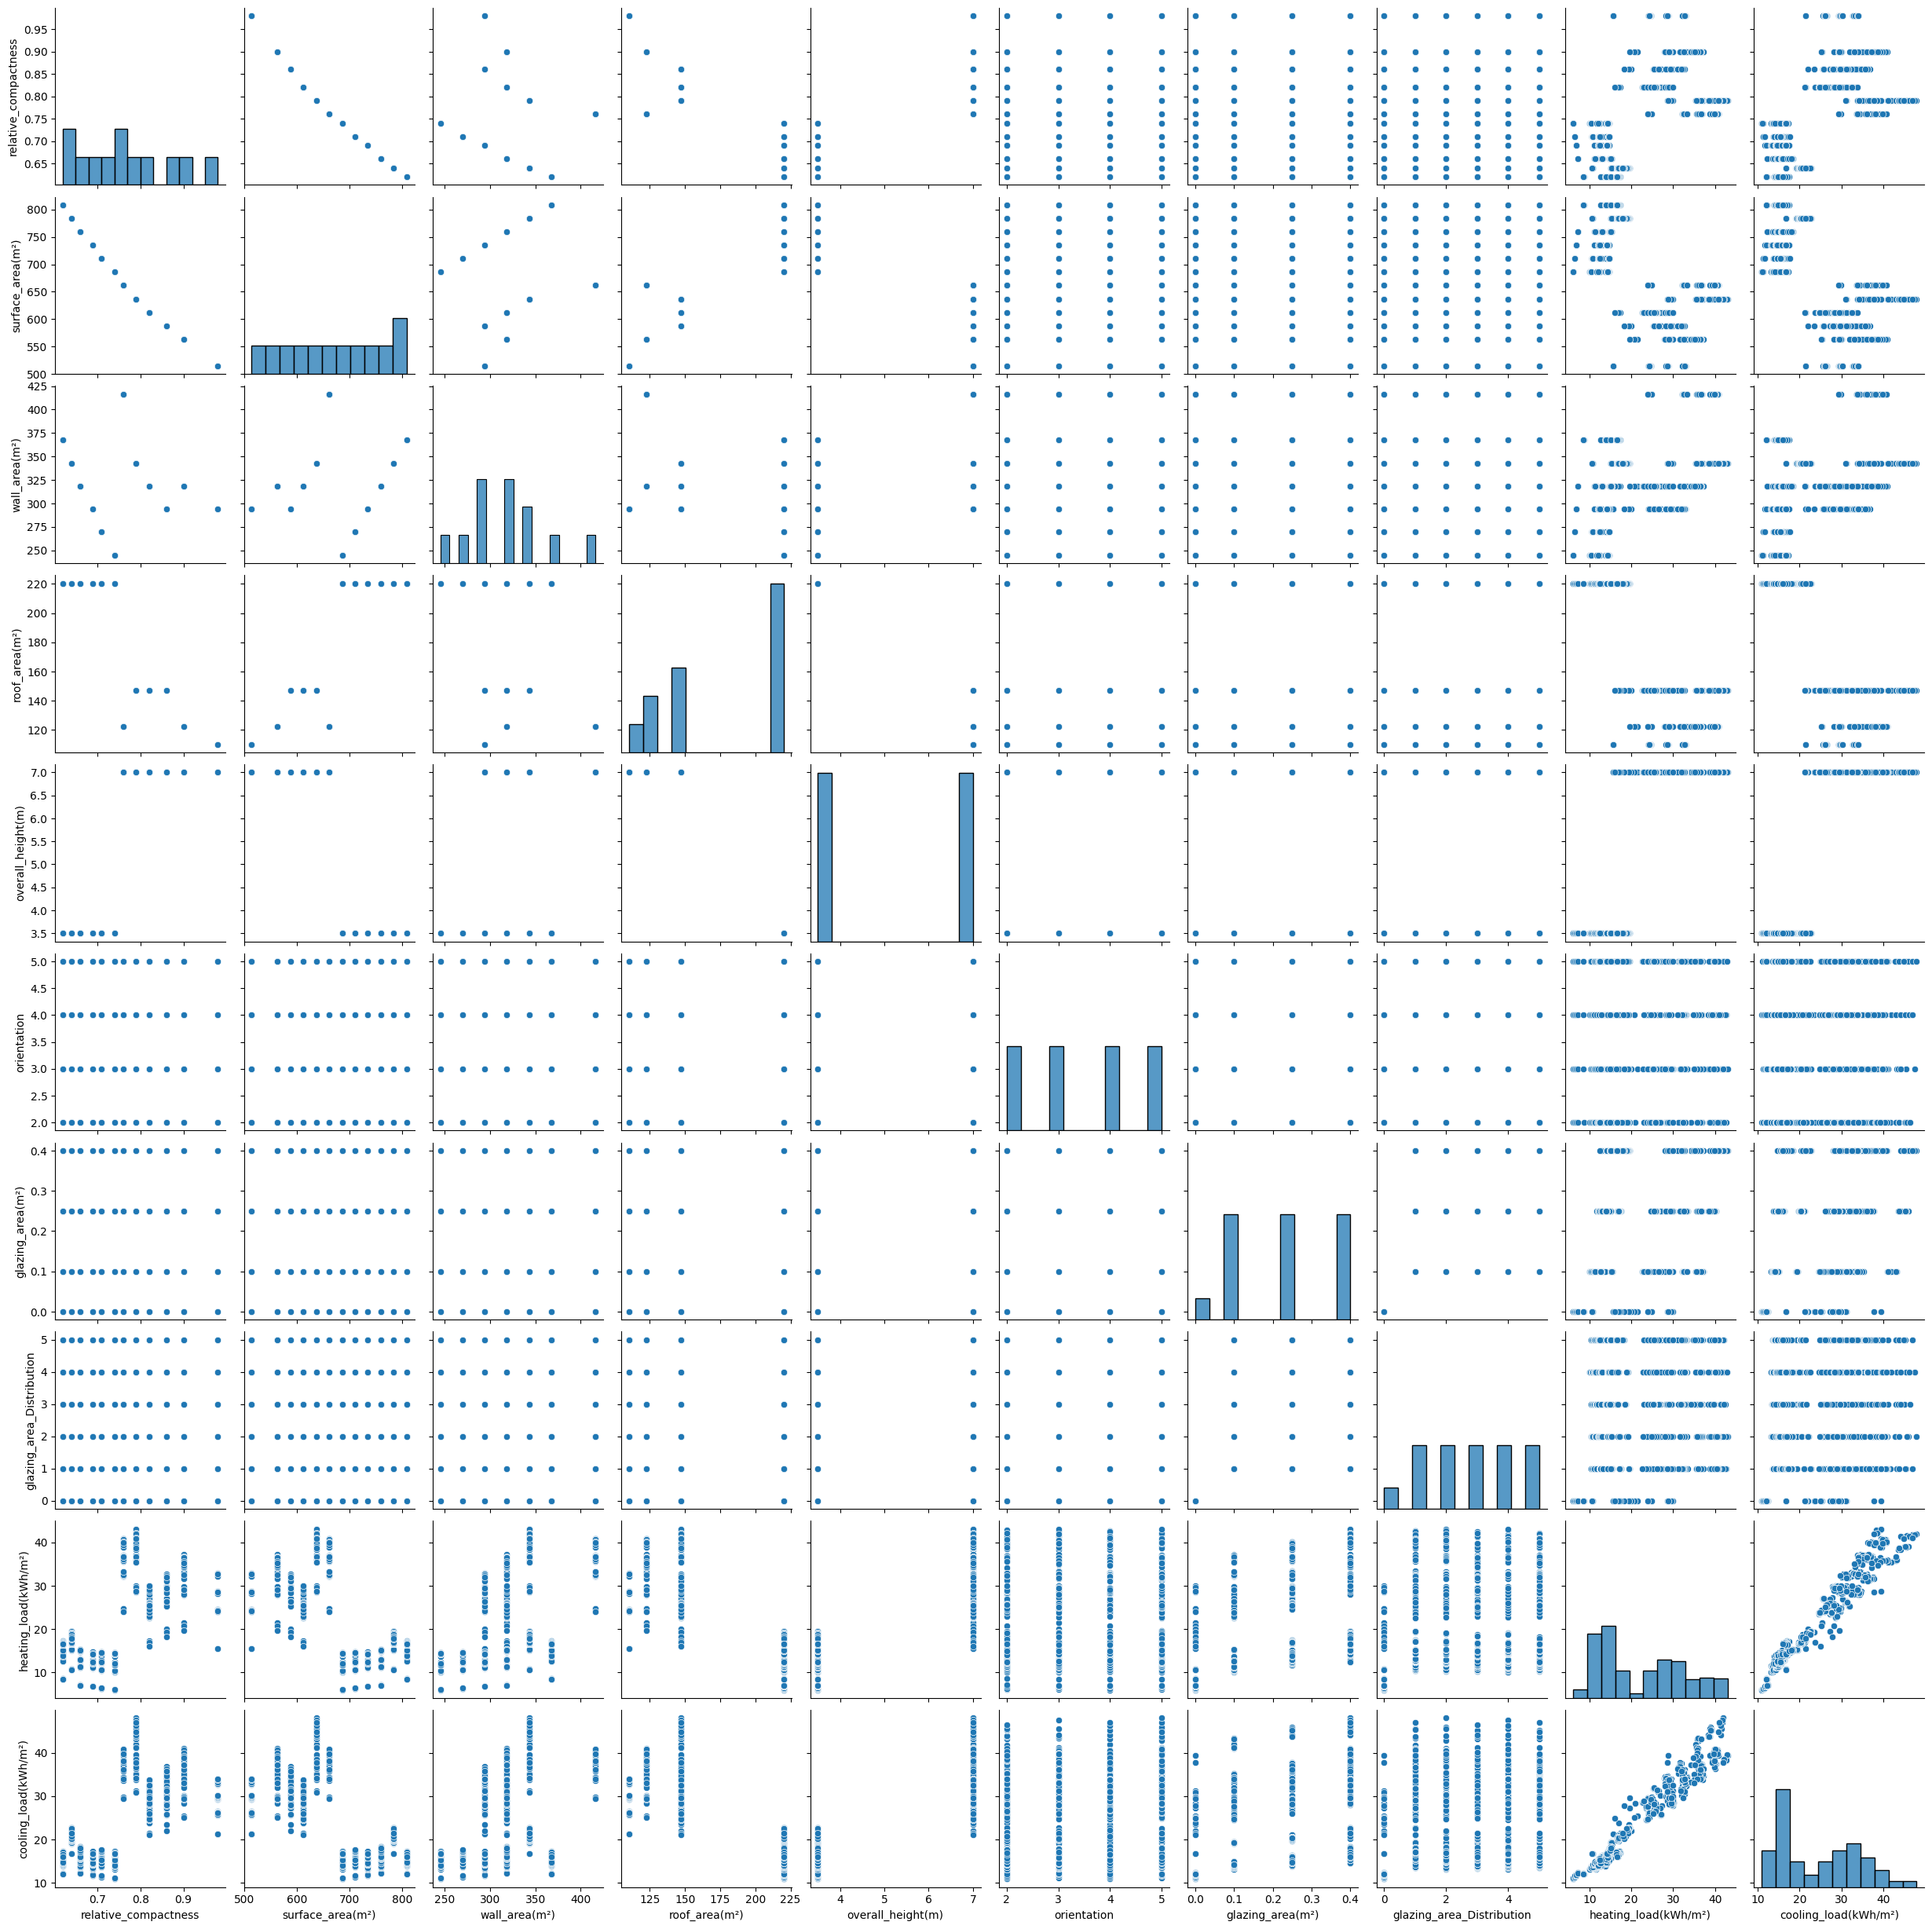

In [72]:
## relationship between independent variables through pairplot

sns.pairplot(data=df)
plt.show()

There seems to be some relationship between the independent and dependent variables except for orientation and glazing area. There seems to be hardly any or no relationship between these two and the heating and cooling loads.

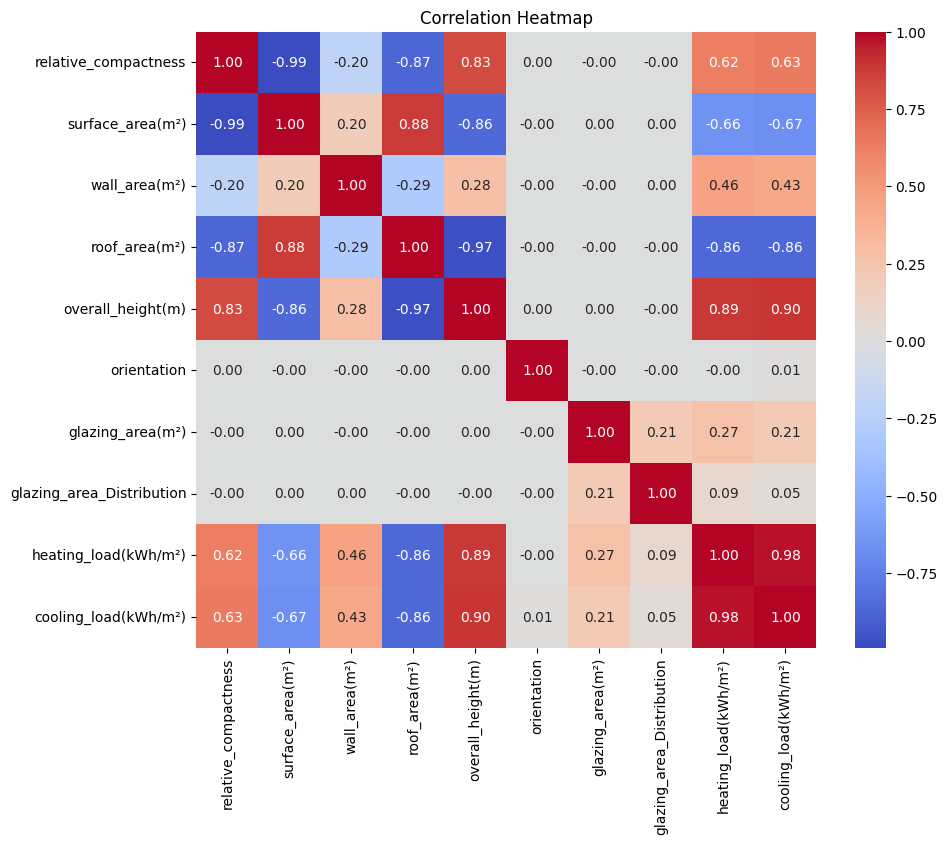

In [73]:
## Correlation analysis through heatmap
corr_matrix = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt = ".2f")
plt.title("Correlation Heatmap")
plt.show()

As suspected the orientation has about 0 correlationship with the traget variables. Also there seems to be the issue of multicollinearity between the features.

In [74]:
## search for highly correlated columns
# Set a correlation threshold
threshold = 0.85

# Iterate through the correlation matrix to identify highly correlated columns
high_corr = []
for col in corr_matrix.columns:
    for idx in corr_matrix.index:
        if col not in  ['heating_load(kWh/m²)','cooling_load(kWh/m²)'] and idx not in  ['heating_load(kWh/m²)','cooling_load(kWh/m²)']:
            if col != idx and abs(corr_matrix.loc[col, idx]) >= threshold:
                high_corr.append((col, idx))

# Display the highly correlated pairs
high_corr = list(set(tuple(sorted(pair)) for pair in high_corr))
high_corr


[('relative_compactness', 'roof_area(m²)'),
 ('relative_compactness', 'surface_area(m²)'),
 ('overall_height(m)', 'surface_area(m²)'),
 ('roof_area(m²)', 'surface_area(m²)'),
 ('overall_height(m)', 'roof_area(m²)')]

Relative compactness, surface area, roof area and overall height has greater correlation with each other which could pose problems regarding models predictions and learning.

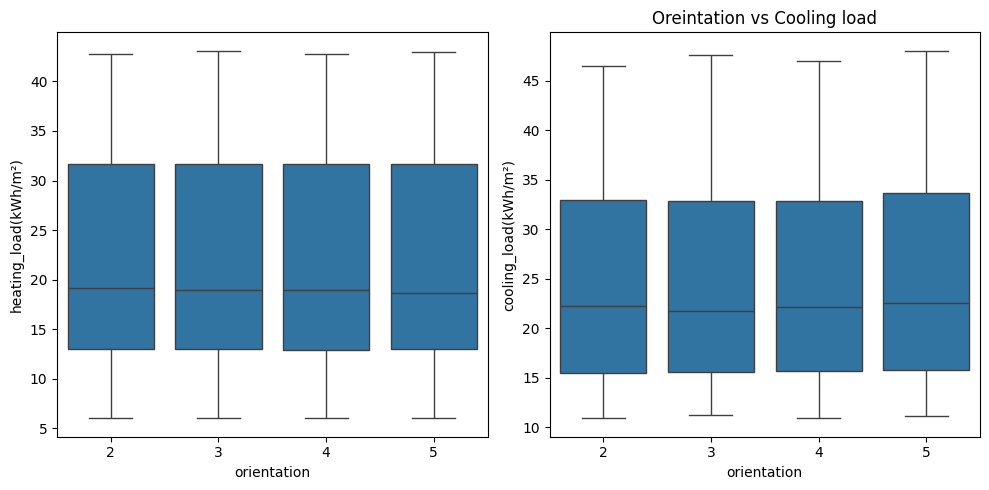

In [75]:
## Let's asses the importance of orientation with the target variables
fig, axes = plt.subplots(1,2, figsize = (10,5))
sns.boxplot(data=df, x='orientation', y='heating_load(kWh/m²)', ax = axes[0])
plt.title('Oreintation vs Heating load')

sns.boxplot(data=df, x='orientation', y='cooling_load(kWh/m²)', ax = axes[1])
plt.title('Oreintation vs Cooling load')
plt.tight_layout()
plt.show()

It's evident that the orientation doesn't play any role as deciding factor of either heating or cooling loads.

**Distribution Insights:**

**Glazing** 
- Area: Values range between 0.1 and 0.8 with a mean of 0.35.
- Overall Height: Ranges from 1.0 to 6.5 meters, with a mean of 3.5 meters.
- Surface Area: Varies from 600 to 1600, with a mean of 1000.

**Bimodal Distributions:**
- Heating Load: Two peaks observed, with a mean of 44.8 and a standard deviation of 20.5.
- Cooling Load: Bimodal distribution with a mean of 22.4 and standard deviation of 12.9.

**Multicollinearity:**

- Relative Compactness and Surface Area: Correlation coefficient of 0.95.
- Surface Area and Overall Height: Correlation coefficient of 0.88.
- Roof Area and Overall Height: Correlation coefficient of 0.82.

**Orientation Impact:**
- Heating Load: Mean of 44.8 with no significant difference across different orientations (mean variations ≤ 5%).
- Cooling Load: Mean of 22.4 with no significant change for different orientations.

**Feature Relationships:**

- Correlation Heatmap: Strong positive correlations for features like Relative Compactness vs. Surface Area (0.95) and Roof Area vs. Overall Height (0.82).
 -Pairplot: Shows clear separation between features but suggests Orientation's limited effect on energy loads.**

## Feature Engineering

In [76]:
## Check for duplicates

df[df.duplicated()]

,relative_compactness,surface_area(m²),wall_area(m²),roof_area(m²),overall_height(m),orientation,glazing_area(m²),glazing_area_Distribution,heating_load(kWh/m²),cooling_load(kWh/m²)


In [77]:
##Comduct hypothesis testing for feature importaces
import statsmodels.api as sm

target = ['heating_load(kWh/m²)','cooling_load(kWh/m²)']

X = df.drop(columns = target, axis=1)
X = sm.add_constant(X)

y1 = df['heating_load(kWh/m²)']
y2 = df['cooling_load(kWh/m²)']

model_y1 = sm.OLS(y1, X).fit()
model_y2 = sm.OLS(y2, X).fit()

print("OLS Model Summary for Heating Load:")
print(model_y1.summary())

OLS Model Summary for Heating Load:
                             OLS Regression Results                             
Dep. Variable:     heating_load(kWh/m²)   R-squared:                       0.916
Model:                              OLS   Adj. R-squared:                  0.915
Method:                   Least Squares   F-statistic:                     1187.
Date:                  Thu, 06 Feb 2025   Prob (F-statistic):               0.00
Time:                          23:03:09   Log-Likelihood:                -1912.5
No. Observations:                   768   AIC:                             3841.
Df Residuals:                       760   BIC:                             3878.
Df Model:                             7                                         
Covariance Type:              nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

In [78]:
print("OLS Model Summary for Cooling Load:")
print(model_y2.summary())

OLS Model Summary for Cooling Load:
                             OLS Regression Results                             
Dep. Variable:     cooling_load(kWh/m²)   R-squared:                       0.888
Model:                              OLS   Adj. R-squared:                  0.887
Method:                   Least Squares   F-statistic:                     859.1
Date:                  Thu, 06 Feb 2025   Prob (F-statistic):               0.00
Time:                          23:03:09   Log-Likelihood:                -1979.3
No. Observations:                   768   AIC:                             3975.
Df Residuals:                       760   BIC:                             4012.
Df Model:                             7                                         
Covariance Type:              nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

Based on the OLS model summaries, the p-value for "orientation" and "glazing area distribution" in predicting the cooling load are 0.24 and 0.594, respectively, suggesting that both features do not significantly contribute to the model. Therefore, these columns can be removed from the dataset when predicting cooling load. However, for predicting the heating load, the p-value for "orientation" is 0.805, indicating that it is not a useful predictor, while the p-value for "glazing area" is 0.004, showing that it plays a significant role in predicting the heating load.

In [79]:
## remove orientation colums
df = df.drop(columns = ['orientation'], axis=1)
df.head()

,relative_compactness,surface_area(m²),wall_area(m²),roof_area(m²),overall_height(m),glazing_area(m²),glazing_area_Distribution,heating_load(kWh/m²),cooling_load(kWh/m²)
0,0.98,514.5,294.0,110.25,7.0,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,0.0,0,20.84,28.28


As the columns Relative compactness and Surface area are correlated one of them will be dropped. Similarly, the columns roof area and overall height are also highly correlated and hence on of these columns is also removed.

In [80]:
## Remove multicolliniearity
df = df.drop(columns = ['relative_compactness','roof_area(m²)'], axis=1)
df.head()

,surface_area(m²),wall_area(m²),overall_height(m),glazing_area(m²),glazing_area_Distribution,heating_load(kWh/m²),cooling_load(kWh/m²)
0,514.5,294.0,7.0,0.0,0,15.55,21.33
1,514.5,294.0,7.0,0.0,0,15.55,21.33
2,514.5,294.0,7.0,0.0,0,15.55,21.33
3,514.5,294.0,7.0,0.0,0,15.55,21.33
4,563.5,318.5,7.0,0.0,0,20.84,28.28


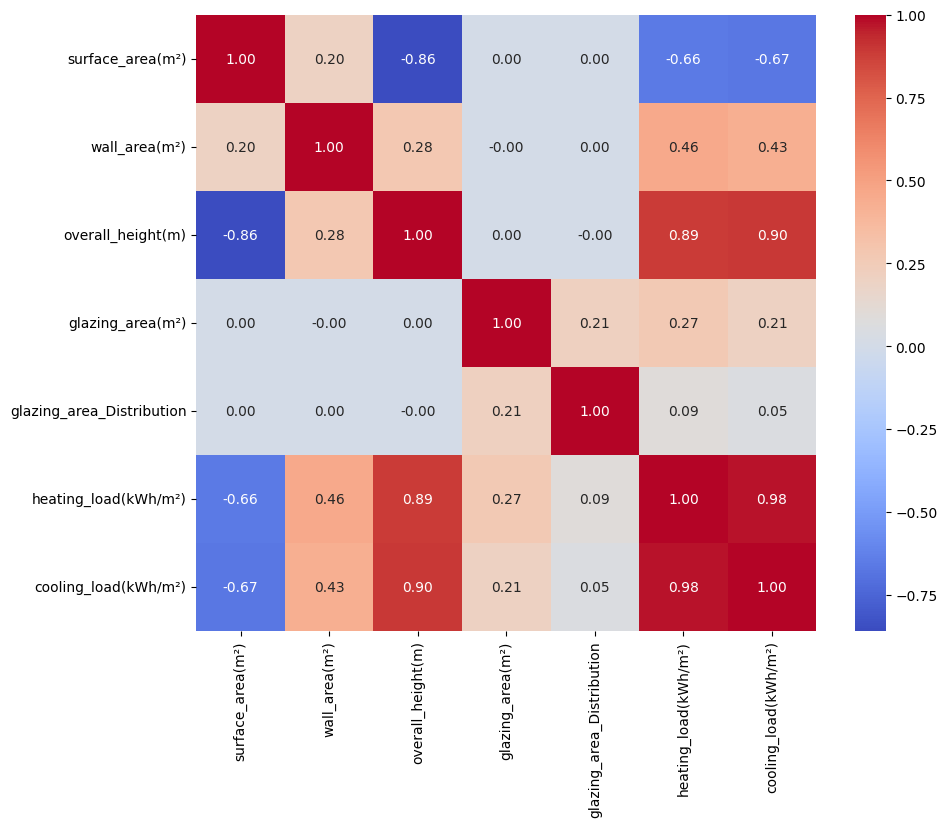

In [81]:
## Recheck the correlation
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

## Preprocessing

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [83]:
## Splitting the data into train and test split
X = df.drop(columns=target)
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [84]:
X_train

,surface_area(m²),wall_area(m²),overall_height(m),glazing_area(m²),glazing_area_Distribution
60,612.5,318.5,7.0,0.10,1
618,784.0,343.0,3.5,0.40,2
346,588.0,294.0,7.0,0.25,2
294,563.5,318.5,7.0,0.25,1
231,759.5,318.5,3.5,0.10,4
...,...,...,...,...,...
71,661.5,416.5,7.0,0.10,1
106,588.0,294.0,7.0,0.10,2
270,710.5,269.5,3.5,0.10,5
435,514.5,294.0,7.0,0.25,4


In [85]:
## scale the data
scaler = StandardScaler()
scale_cols = ['surface_area(m²)', 'wall_area(m²)', 'overall_height(m)', 'glazing_area(m²)']
X_train[scale_cols] = scaler.fit_transform(X_train[scale_cols])
X_test[scale_cols] = scaler.transform(X_test[scale_cols])

## Model Training

In [86]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.multioutput import MultiOutputRegressor

In [87]:
# Define Multi-Output Models
models = {
    "Decision Tree": MultiOutputRegressor(DecisionTreeRegressor()),
    "Random Forest": MultiOutputRegressor(RandomForestRegressor()),
    "Gradient Boosting": MultiOutputRegressor(GradientBoostingRegressor()),
    "Linear Regression": MultiOutputRegressor(LinearRegression()),
    "XGBRegressor": MultiOutputRegressor(XGBRegressor(objective='reg:squarederror')),
    "CatBoost Regressor": MultiOutputRegressor(CatBoostRegressor(verbose=False)),
    "AdaBoost Regressor": MultiOutputRegressor(AdaBoostRegressor()),
}

# Hyperparameter Grid (for Multi-Output Models)
params = {
    "Decision Tree": {
        'estimator__criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
        'estimator__splitter': ['best', 'random'],
        'estimator__max_features': ['sqrt', 'log2'],
    },
    "Random Forest": {
        'estimator__criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
        'estimator__max_features': ['sqrt', 'log2', None],
        'estimator__n_estimators': [32, 64, 128, 256]
    },
    "Gradient Boosting": {
        'estimator__loss': ['squared_error', 'huber', 'absolute_error', 'quantile'],
        'estimator__learning_rate': [0.1, 0.01, 0.05, 0.001],
        'estimator__subsample': [0.7, 0.75, 0.8, 0.85, 0.9],
        'estimator__criterion': ['squared_error', 'friedman_mse'],
        'estimator__max_features': [1.0, 'sqrt', 'log2'],
        'estimator__n_estimators': [32, 64, 128, 256]
    },
    "Linear Regression": {},
    "XGBRegressor": {
        'estimator__learning_rate': [0.1, 0.01, 0.05, 0.001],
        'estimator__n_estimators': [32, 64, 128, 256]
    },
    "CatBoost Regressor": {
        'estimator__depth': [6, 8, 10],
        'estimator__learning_rate': [0.01, 0.05, 0.1],
        'estimator__iterations': [30, 50, 100]
    },
    "AdaBoost Regressor": {
        'estimator__learning_rate': [0.1, 0.01, 0.5, 0.001],
        'estimator__loss': ['linear', 'square', 'exponential'],
        'estimator__n_estimators': [32, 64, 128, 256]
    }
}


In [88]:
from tqdm import tqdm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

test_report = {}
for i in tqdm(range(len(list(models.values())))):
    model = list(models.values())[i]
    param = list(params.values())[i]

    gs = GridSearchCV(model,param_grid=param, cv = 3, n_jobs=1)
    gs.fit(X_train, y_train)

    model.set_params(**gs.best_params_)
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)

    y_test_pred = model.predict(X_test)

    train_model_score = []
    test_model_score = []

    # train model scores
    rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    mae = mean_absolute_error(y_train, y_train_pred)
    r2 = r2_score(y_train, y_train_pred)

    train_model_score.extend([rmse, mae, r2])

    #test model scores
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    mae_test = mean_absolute_error(y_test, y_test_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    test_model_score.extend([rmse_test, mae_test, r2_test])

    test_report[list(models.keys())[i]] = test_model_score

100%|██████████| 7/7 [30:17<00:00, 259.60s/it]


In [89]:
test_report_df = pd.DataFrame.from_dict(test_report, orient = 'index', columns = ["RMSE", "MAE", "R²"])
test_report_df

,RMSE,MAE,R²
Decision Tree,1.647651,0.877240,0.970879
Random Forest,1.569812,0.845080,0.973563
Gradient Boosting,1.309820,0.782356,0.981643
Linear Regression,3.180705,2.321971,0.896664
XGBRegressor,1.497647,0.810589,0.975934
CatBoost Regressor,1.348664,0.789226,0.980511
AdaBoost Regressor,2.155862,1.775054,0.952044


As per the model performance, gradient boosting alogorithm is showing the best R2 score and thereby is performing well with 98% of variation explained in the dataset

In [90]:
best_model_score = test_report_df['R²'].max()
best_model_name = test_report_df[test_report_df['R²'] == best_model_score].index[0]
best_model = models[best_model_name]
best_model

MultiOutputRegressor(estimator=GradientBoostingRegressor(learning_rate=0.05,
                                                         max_features='sqrt',
                                                         n_estimators=256,
                                                         subsample=0.75))

In [91]:
import pickle

with open('model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

## Prediction

In [93]:
## Input data

input_data = {
    'surface_area(m²)': [500],
    'wall_area(m²)': [300],
    'overall_height(m)': [7],
    'glazing_area(m²)': [0.2],  # Value within the range 0 to 0.4
    'glazing_area_Distribution': [3]
}

input_df = pd.DataFrame(input_data)
prediction = best_model.predict(input_df)
print(prediction)

[[26.61715703 27.44171708]]


In [94]:
test_report_df.to_csv("model_performances.csv", index=True)


In [95]:
import pickle

with open('model.pkl','rb') as file:
    model = pickle.load(file)

In [96]:
input_data = {
    'surface_area(m²)': [800],
    'wall_area(m²)': [500],
    'overall_height(m)': [3.5],
    'glazing_area(m²)': [0.3],  # Value within the range 0 to 0.4
    'glazing_area_Distribution': [7]
}

input_df = pd.DataFrame(input_data)
scale_cols = ['surface_area(m²)', 'wall_area(m²)', 'overall_height(m)', 'glazing_area(m²)']
input_df[scale_cols] = scaler.transform(input_df[scale_cols])
prediction = model.predict(input_df)
print(prediction)

[[14.62865887 14.99797091]]
